<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Time_Series/LSTM_air_Vinicius_Recorrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn import preprocessing

In [3]:
!git clone https://github.com/ucfilho/Vinicius_Air
%cd Vinicius_Air

Cloning into 'Vinicius_Air'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Vinicius_Air


In [4]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
name= 'Planilha completa mestrado.xlsx'
df = pd.read_excel(name)
# plot the time series
df.head(3)

,DATA,Precipitação (mm),P atm (mB),Temp. ar (ºC),Um. rel. ar (%),População,Veículos,PTS,MP10,O3
0,1/2003,NaN,NaN,NaN,NaN,556254.299669,71723.281054,NaN,NaN,NaN
1,2/2003,NaN,NaN,NaN,NaN,557011.709545,74999.467405,NaN,NaN,NaN
2,3/2003,0.282308,917.201154,22.635385,76.388462,557768.292058,78263.122785,68.755,33.26,NaN


In [5]:
columns_name = ['DATA', 'PTS']
df = df[columns_name]
df.head(3)

,DATA,PTS
0,1/2003,NaN
1,2/2003,NaN
2,3/2003,68.755


In [6]:
df = df.dropna()
df.tail(10)

,DATA,PTS
178,11/2017,55.710896
179,12/2017,18.374293
180,1/2018,25.316619
209,6/2020,88.091730
210,7/2020,74.194190
211,8/2020,80.175515
216,1/2021,54.168978
217,2/2021,39.611076
218,3/2021,49.191477
219,4/2021,63.342564


In [7]:
series = np.array(df['PTS'])

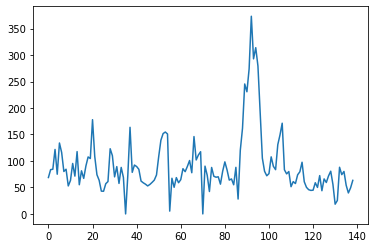

In [8]:
plt.plot(series)

In [9]:
series = series.reshape(-1, 1)
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(series)
series =  scaler_X.transform(series)

In [10]:
P = 10 # period
D = 1
X = []
Y = []
num,col = df.shape

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (129, 10, 1) output shape (129, 1)


In [11]:
N, cols, other = X.shape
N1 = int(0.8*N)
X_train = X[:N1]
Y_train = Y[:N1]
X_test = X[N1:]
Y_test = Y[N1:]

In [12]:
X_test.shape

(26, 10, 1)

In [13]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(10,'tanh'))
# Add a Dense layer with 1 units.
model.add(Dense(1))
# 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
4/4 [==============================] - 22s 211ms/step - loss: 0.2336 - val_loss: 0.0738
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0792 - val_loss: 0.0092
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0940 - val_loss: 0.0318
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0710 - val_loss: 0.0738
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0746 - val_loss: 0.0160
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0544 - val_loss: 0.0092
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0470 - val_loss: 0.0232
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0374 - val_loss: 0.0222
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0466 - val_loss: 0.0142
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0420 - val_loss: 0.0154
Epoch 11/100
4/4 [========

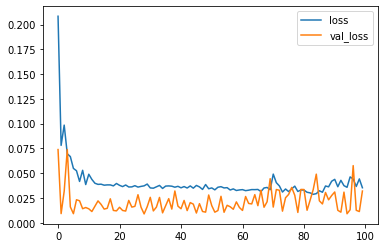

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [17]:
pred_Y = model.predict(X_test)

pred_Y  = scaler_X.inverse_transform(np.array(pred_Y ).reshape(-1,1))
Y_test = scaler_X.inverse_transform(np.array(Y_test).reshape(-1,1))

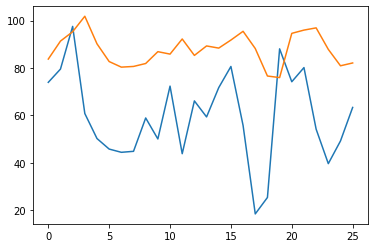

In [18]:
# this is a wrong way to do....

plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [19]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

pred_test  = scaler_X.inverse_transform(np.array(pred_test).reshape(-1,1))

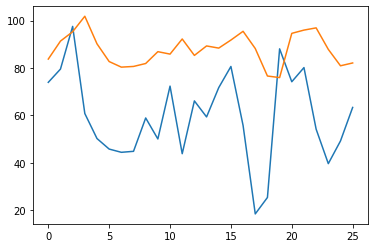

In [20]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [21]:
X_train.shape

(103, 10, 1)

In [22]:
X_test.shape

(26, 10, 1)